# Suicide Rates Overview
This is a data analysis project where I analyze the suicide rates of certain countries provided by the dataset from 1985 to 2016.<br>
The data set contains various features/attributes such as the country, year, sex, age, population and of of course, the number of suicides.

## Data Wrangling
Data wrangling/manipulation is taking our input data from its original state and putting it in a format where we can perform meaningful analysis on it.<br>
I'm going to perform some data wrangling by cleaning my data, transforming it and enriching it.

In [1]:
import pandas as pd

In [2]:
sr = pd.read_csv('data/master.csv')

In [3]:
sr.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [4]:
sr.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Upon printing out the column names, I see that one column has some whitespace.<br>
I decide to remove this whitespace manually.

In [5]:
sr.rename(columns={' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace=True)

In [6]:
sr.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
sr.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

The year column has 32 unique values.  I then use this column as the index.<br>
The values are not sorted as seen from the output array of the unique values of the year, so I then decide to sort the index.

In [8]:
sr.set_index('year', inplace=True)

In [9]:
sr.head()

country     sex          age  suicides_no  population  \
year                                                          
1987  Albania    male  15-24 years           21      312900   
1987  Albania    male  35-54 years           16      308000   
1987  Albania  female  15-24 years           14      289700   
1987  Albania    male    75+ years            1       21800   
1987  Albania    male  25-34 years            9      274300   

      suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
year                                                                  
1987               6.71  Albania1987           NaN    2,156,624,900   
1987               5.19  Albania1987           NaN    2,156,624,900   
1987               4.83  Albania1987           NaN    2,156,624,900   
1987               4.59  Albania1987           NaN    2,156,624,900   
1987               3.28  Albania1987           NaN    2,156,624,900   

      gdp_per_capita ($)       generation  
year                                       
1987                 796     Generation X  
1987                 796           Silent  
1987                 796     Generation X  
1987                 796  G.I. Generation  
1987                 796          Boomers

In [10]:
sr.sort_index(inplace=True)

In [11]:
sr.head()

country     sex          age  suicides_no  \
year                                                                   
1985  Saint Vincent and Grenadines    male  35-54 years            2   
1985  Saint Vincent and Grenadines  female  55-74 years            0   
1985  Saint Vincent and Grenadines  female    75+ years            0   
1985  Saint Vincent and Grenadines    male  15-24 years            0   
1985  Saint Vincent and Grenadines    male  25-34 years            0   

      population  suicides/100k pop                      country-year  \
year                                                                    
1985        6100              32.79  Saint Vincent and Grenadines1985   
1985        4100               0.00  Saint Vincent and Grenadines1985   
1985        1000               0.00  Saint Vincent and Grenadines1985   
1985       12100               0.00  Saint Vincent and Grenadines1985   
1985        9300               0.00  Saint Vincent and Grenadines1985   

      HDI for year gdp_for_year ($)  gdp_per_capita ($)       generation  
year                                                                      
1985           NaN      145,641,704                1622           Silent  
1985           NaN      145,641,704                1622  G.I. Generation  
1985           NaN      145,641,704                1622  G.I. Generation  
1985           NaN      145,641,704                1622     Generation X  
1985           NaN      145,641,704                1622          Boomers

In [12]:
sr.index.unique()

Int64Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

The index has now been sorted.

In [13]:
sr.dtypes

country                object
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)       object
gdp_per_capita ($)      int64
generation             object
dtype: object

Upon printing the datatypes I realize that the gdp_for_year ($) column is an object. <br>
This should be numerical since the column is for gdp.  I then change the column to numerical but first I remove the ',' from the values.<br>
This is to make the column values to only contain numbers such that we are able to convert the object column into a numerical column without an error from pandas.

In [14]:
sr['gdp_for_year ($)'] = sr['gdp_for_year ($)'].str.replace(',', '')

In [15]:
sr.head()

country     sex          age  suicides_no  \
year                                                                   
1985  Saint Vincent and Grenadines    male  35-54 years            2   
1985  Saint Vincent and Grenadines  female  55-74 years            0   
1985  Saint Vincent and Grenadines  female    75+ years            0   
1985  Saint Vincent and Grenadines    male  15-24 years            0   
1985  Saint Vincent and Grenadines    male  25-34 years            0   

      population  suicides/100k pop                      country-year  \
year                                                                    
1985        6100              32.79  Saint Vincent and Grenadines1985   
1985        4100               0.00  Saint Vincent and Grenadines1985   
1985        1000               0.00  Saint Vincent and Grenadines1985   
1985       12100               0.00  Saint Vincent and Grenadines1985   
1985        9300               0.00  Saint Vincent and Grenadines1985   

      HDI for year gdp_for_year ($)  gdp_per_capita ($)       generation  
year                                                                      
1985           NaN        145641704                1622           Silent  
1985           NaN        145641704                1622  G.I. Generation  
1985           NaN        145641704                1622  G.I. Generation  
1985           NaN        145641704                1622     Generation X  
1985           NaN        145641704                1622          Boomers

In [16]:
sr['gdp_for_year ($)'] = sr['gdp_for_year ($)'].astype('int64')

In [17]:
sr.dtypes

country                object
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

The column is now in int64.<br>
The sex and the age columns need to be changed into categorical values.  This is because all their possible values fall into a finite number of groups as per our dataset.

In [18]:
sr = sr.assign(
    sex=lambda x: x.sex.astype('category'),
    age=lambda x: x.age.astype('category')
)

In [19]:
sr.dtypes

country                 object
sex                   category
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year            object
HDI for year           float64
gdp_for_year ($)         int64
gdp_per_capita ($)       int64
generation              object
dtype: object

In [20]:
sr.sex.describe()

count      27820
unique         2
top       female
freq       13910
Name: sex, dtype: object

In [21]:
sr.age.describe()

count           27820
unique              6
top       15-24 years
freq             4642
Name: age, dtype: object

All the columns are now in the appropriate data types.  The sex columns has 2 unique values (male and female).<br>
The age given by our dataframe is in 6 groups/categories.  The top category is 15-24 years.

In [22]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 1985 to 2016
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   sex                 27820 non-null  category
 2   age                 27820 non-null  category
 3   suicides_no         27820 non-null  int64   
 4   population          27820 non-null  int64   
 5   suicides/100k pop   27820 non-null  float64 
 6   country-year        27820 non-null  object  
 7   HDI for year        8364 non-null   float64 
 8   gdp_for_year ($)    27820 non-null  int64   
 9   gdp_per_capita ($)  27820 non-null  int64   
 10  generation          27820 non-null  object  
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 3.2+ MB


The column HDI for year contains (27820 - 8364) null values.  These null values are way too many so I decide to drop this column.

In [23]:
sr.head()

country     sex          age  suicides_no  \
year                                                                   
1985  Saint Vincent and Grenadines    male  35-54 years            2   
1985  Saint Vincent and Grenadines  female  55-74 years            0   
1985  Saint Vincent and Grenadines  female    75+ years            0   
1985  Saint Vincent and Grenadines    male  15-24 years            0   
1985  Saint Vincent and Grenadines    male  25-34 years            0   

      population  suicides/100k pop                      country-year  \
year                                                                    
1985        6100              32.79  Saint Vincent and Grenadines1985   
1985        4100               0.00  Saint Vincent and Grenadines1985   
1985        1000               0.00  Saint Vincent and Grenadines1985   
1985       12100               0.00  Saint Vincent and Grenadines1985   
1985        9300               0.00  Saint Vincent and Grenadines1985   

      HDI for year  gdp_for_year ($)  gdp_per_capita ($)       generation  
year                                                                       
1985           NaN         145641704                1622           Silent  
1985           NaN         145641704                1622  G.I. Generation  
1985           NaN         145641704                1622  G.I. Generation  
1985           NaN         145641704                1622     Generation X  
1985           NaN         145641704                1622          Boomers

In [24]:
sr.dropna(axis=1, inplace=True)

In [25]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 1985 to 2016
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   sex                 27820 non-null  category
 2   age                 27820 non-null  category
 3   suicides_no         27820 non-null  int64   
 4   population          27820 non-null  int64   
 5   suicides/100k pop   27820 non-null  float64 
 6   country-year        27820 non-null  object  
 7   gdp_for_year ($)    27820 non-null  int64   
 8   gdp_per_capita ($)  27820 non-null  int64   
 9   generation          27820 non-null  object  
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Our dataframe no longer contains null values.

In [26]:
len(sr.country.value_counts())

101

In [27]:
sr.country.unique()

array(['Saint Vincent and Grenadines', 'Seychelles', 'Singapore',
       'Greece', 'France', 'Austria', 'Dominica', 'Spain', 'Sri Lanka',
       'Ecuador', 'Grenada', 'Ireland', 'Portugal', 'Argentina', 'Italy',
       'Israel', 'Puerto Rico', 'Republic of Korea', 'Iceland',
       'Costa Rica', 'Belgium', 'Barbados', 'Bahrain',
       'Trinidad and Tobago', 'Australia', 'United Kingdom',
       'United States', 'Bahamas', 'Brazil', 'Uruguay', 'Colombia',
       'Chile', 'Suriname', 'Bulgaria', 'Thailand', 'Canada',
       'Antigua and Barbuda', 'Malta', 'Kuwait', 'Jamaica', 'Panama',
       'Paraguay', 'Japan', 'New Zealand', 'Mauritius', 'Mexico',
       'Luxembourg', 'Netherlands', 'Norway', 'Belize', 'Saint Lucia',
       'Guatemala', 'Turkmenistan', 'Ukraine', 'Finland', 'Sweden',
       'Albania', 'Guyana', 'Russian Federation', 'Romania', 'Germany',
       'Poland', 'Uzbekistan', 'Georgia', 'Kyrgyzstan', 'Czech Republic',
       'Azerbaijan', 'Belarus', 'Saint Kitts and Nevis', 

Our dataset contains data about suicides for 101 different countries.

In [28]:
sr.head()

country     sex          age  suicides_no  \
year                                                                   
1985  Saint Vincent and Grenadines    male  35-54 years            2   
1985  Saint Vincent and Grenadines  female  55-74 years            0   
1985  Saint Vincent and Grenadines  female    75+ years            0   
1985  Saint Vincent and Grenadines    male  15-24 years            0   
1985  Saint Vincent and Grenadines    male  25-34 years            0   

      population  suicides/100k pop                      country-year  \
year                                                                    
1985        6100              32.79  Saint Vincent and Grenadines1985   
1985        4100               0.00  Saint Vincent and Grenadines1985   
1985        1000               0.00  Saint Vincent and Grenadines1985   
1985       12100               0.00  Saint Vincent and Grenadines1985   
1985        9300               0.00  Saint Vincent and Grenadines1985   

      gdp_for_year ($)  gdp_per_capita ($)       generation  
year                                                         
1985         145641704                1622           Silent  
1985         145641704                1622  G.I. Generation  
1985         145641704                1622  G.I. Generation  
1985         145641704                1622     Generation X  
1985         145641704                1622          Boomers

In [29]:
sr['suicides_rate'] = pd.cut(
    sr['suicides_no'], bins=3, labels=['low', 'med', 'high']
)

I use the pd.cut method to put the suicides_no variable into bins.<br>
We can now see which countries have the highest number of suicides per particular year using different age groups and sex.

In [30]:
sr[sr.suicides_rate=='high']

country   sex          age  suicides_no  population  \
year                                                                   
1992  Russian Federation  male  35-54 years        15824    18933500   
1993  Russian Federation  male  35-54 years        20256    18908000   
1994  Russian Federation  male  35-54 years        22338    19044200   
1995  Russian Federation  male  35-54 years        21706    19249600   
1996  Russian Federation  male  35-54 years        20562    19507100   
1997  Russian Federation  male  35-54 years        18973    19913400   
1998  Russian Federation  male  35-54 years        18058    20487900   
1999  Russian Federation  male  35-54 years        20705    21016400   
2000  Russian Federation  male  35-54 years        21063    21378098   
2001  Russian Federation  male  35-54 years        21262    21476420   
2002  Russian Federation  male  35-54 years        20119    21320535   
2003  Russian Federation  male  35-54 years        18681    21007346   
2004  Russian Federation  male  35-54 years        17465    20843896   
2005  Russian Federation  male  35-54 years        15843    20550405   

      suicides/100k pop            country-year  gdp_for_year ($)  \
year                                                                
1992              83.58  Russian Federation1992      460290556901   
1993             107.13  Russian Federation1993      435083713851   
1994             117.30  Russian Federation1994      395077301248   
1995             112.76  Russian Federation1995      395531066563   
1996             105.41  Russian Federation1996      391719993757   
1997              95.28  Russian Federation1997      404926534140   
1998              88.14  Russian Federation1998      270953116950   
1999              98.52  Russian Federation1999      195905767669   
2000              98.53  Russian Federation2000      259708496267   
2001              99.00  Russian Federation2001      306602673980   
2002              94.36  Russian Federation2002      345110438692   
2003              88.93  Russian Federation2003      430347770732   
2004              83.79  Russian Federation2004      591016690743   
2005              77.09  Russian Federation2005      764017107992   

      gdp_per_capita ($) generation suicides_rate  
year                                               
1992                3333    Boomers          high  
1993                3160    Boomers          high  
1994                2853    Boomers          high  
1995                2844    Boomers          high  
1996                2813    Boomers          high  
1997                2907    Boomers          high  
1998                1948    Boomers          high  
1999                1412    Boomers          high  
2000                1879    Boomers          high  
2001                2229    Boomers          high  
2002                2527    Boomers          high  
2003                3141    Boomers          high  
2004                4312    Boomers          high  
2005                5611    Boomers          high

We can see that Russia Federation is the country with the most number of suicides.

In [31]:
sr['population_rate'] = pd.cut(
    sr['population'], bins=3, labels=['low', 'med', 'high']
)

I also use the pd.cut method to put the population variable into bins.<br>

In [32]:
sr.population_rate.value_counts()

low     27138
med       615
high       67
Name: population_rate, dtype: int64

Most of the countries in this dataframe have a low population

In [33]:
sr.suicides_rate.value_counts()

low     27711
med        95
high       14
Name: suicides_rate, dtype: int64

The dataset is now in the form that I want.<br>
I cleaned the data frame and removed na values.<br>
I enriched the dataframe by adding the population_rate and suicides_rate columns.<br>
I transformed the dataframe by setting the year as the index and sorting it.<br>
Now it's time for some EDA!<br>

# Exploratory Data Analysis

In [34]:
sr.head()

country     sex          age  suicides_no  \
year                                                                   
1985  Saint Vincent and Grenadines    male  35-54 years            2   
1985  Saint Vincent and Grenadines  female  55-74 years            0   
1985  Saint Vincent and Grenadines  female    75+ years            0   
1985  Saint Vincent and Grenadines    male  15-24 years            0   
1985  Saint Vincent and Grenadines    male  25-34 years            0   

      population  suicides/100k pop                      country-year  \
year                                                                    
1985        6100              32.79  Saint Vincent and Grenadines1985   
1985        4100               0.00  Saint Vincent and Grenadines1985   
1985        1000               0.00  Saint Vincent and Grenadines1985   
1985       12100               0.00  Saint Vincent and Grenadines1985   
1985        9300               0.00  Saint Vincent and Grenadines1985   

      gdp_for_year ($)  gdp_per_capita ($)       generation suicides_rate  \
year                                                                        
1985         145641704                1622           Silent           low   
1985         145641704                1622  G.I. Generation           low   
1985         145641704                1622  G.I. Generation           low   
1985         145641704                1622     Generation X           low   
1985         145641704                1622          Boomers           low   

     population_rate  
year                  
1985             low  
1985             low  
1985             low  
1985             low  
1985             low

In [35]:
sr[sr.suicides_rate=='high'].sort_values(by='suicides_no', ascending=False)

country   sex          age  suicides_no  population  \
year                                                                   
1994  Russian Federation  male  35-54 years        22338    19044200   
1995  Russian Federation  male  35-54 years        21706    19249600   
2001  Russian Federation  male  35-54 years        21262    21476420   
2000  Russian Federation  male  35-54 years        21063    21378098   
1999  Russian Federation  male  35-54 years        20705    21016400   
1996  Russian Federation  male  35-54 years        20562    19507100   
1993  Russian Federation  male  35-54 years        20256    18908000   
2002  Russian Federation  male  35-54 years        20119    21320535   
1997  Russian Federation  male  35-54 years        18973    19913400   
2003  Russian Federation  male  35-54 years        18681    21007346   
1998  Russian Federation  male  35-54 years        18058    20487900   
2004  Russian Federation  male  35-54 years        17465    20843896   
2005  Russian Federation  male  35-54 years        15843    20550405   
1992  Russian Federation  male  35-54 years        15824    18933500   

      suicides/100k pop            country-year  gdp_for_year ($)  \
year                                                                
1994             117.30  Russian Federation1994      395077301248   
1995             112.76  Russian Federation1995      395531066563   
2001              99.00  Russian Federation2001      306602673980   
2000              98.53  Russian Federation2000      259708496267   
1999              98.52  Russian Federation1999      195905767669   
1996             105.41  Russian Federation1996      391719993757   
1993             107.13  Russian Federation1993      435083713851   
2002              94.36  Russian Federation2002      345110438692   
1997              95.28  Russian Federation1997      404926534140   
2003              88.93  Russian Federation2003      430347770732   
1998              88.14  Russian Federation1998      270953116950   
2004              83.79  Russian Federation2004      591016690743   
2005              77.09  Russian Federation2005      764017107992   
1992              83.58  Russian Federation1992      460290556901   

      gdp_per_capita ($) generation suicides_rate population_rate  
year                                                               
1994                2853    Boomers          high             med  
1995                2844    Boomers          high             med  
2001                2229    Boomers          high             med  
2000                1879    Boomers          high             med  
1999                1412    Boomers          high             med  
1996                2813    Boomers          high             med  
1993                3160    Boomers          high             med  
2002                2527    Boomers          high             med  
1997                2907    Boomers          high             med  
2003                3141    Boomers          high             med  
1998                1948    Boomers          high             med  
2004                4312    Boomers          high             med  
2005                5611    Boomers          high             med  
1992                3333    Boomers          high             med

Russian Federation has the most years where suicide cases in that year were off the charts. <br>
The male aged between 35-54 years in the Russian Federation has a higher chance of killing himself. 

In [36]:
sr.suicides_rate.value_counts()

low     27711
med        95
high       14
Name: suicides_rate, dtype: int64

Most countries suicides are considered to be relatively with 14 instances being considered high, that of which comes from the country Russia Federation as shown by previous notes.

In [37]:
sr.describe(include='object')

country                      country-year    generation
count     27820                             27820         27820
unique      101                              2321             6
top     Iceland  Saint Vincent and Grenadines1985  Generation X
freq        382                                12          6408

In [38]:
sr[sr.duplicated()].shape[0]

0

Our dataframe has no duplicate values.

In [39]:
sr.reset_index().pivot(columns='country', values='suicides_no').describe().T

count         mean          std   min     25%     50%  \
country                                                                       
Albania               264.0     7.462121     8.414098   0.0    1.00     5.0   
Antigua and Barbuda   324.0     0.033951     0.197716   0.0    0.00     0.0   
Argentina             372.0   221.018817   196.017402   7.0   61.00   164.0   
Armenia               298.0     6.392617     6.740266   0.0    1.00     4.0   
Aruba                 168.0     0.601190     1.067427   0.0    0.00     0.0   
...                     ...          ...          ...   ...     ...     ...   
United Arab Emirates   72.0     8.638889    13.192300   0.0    0.00     3.0   
United Kingdom        372.0   367.755376   379.698095   0.0   97.00   236.0   
United States         372.0  2779.604839  2752.716420  50.0  558.75  2193.0   
Uruguay               336.0    39.101190    36.780371   0.0   10.00    27.0   
Uzbekistan            264.0   131.829545   130.536322   3.0   25.00    83.5   

                          75%      max  
country                                 
Albania                 11.25     39.0  
Antigua and Barbuda      0.00      2.0  
Argentina              360.00    745.0  
Armenia                 10.00     32.0  
Aruba                    1.00      4.0  
...                       ...      ...  
United Arab Emirates     7.75     52.0  
United Kingdom         542.50   1743.0  
United States         4145.50  11767.0  
Uruguay                 60.25    152.0  
Uzbekistan             222.00    528.0  

[101 rows x 8 columns]

Upon viewing the returned dataframe we can see that the United States has worrying statistics.<br>
The minimum number of suicides recorded for the United States between 1985 to 2016 is 50.<br>
The maximum number of suicides recorded for a specific gender and age group per year is 11767.  This is very worrying. 

In [40]:
new = sr.reset_index().pivot(columns='country', values='suicides_no').describe().T

In [41]:
new.sort_values(by='mean', ascending=False)

count         mean          std   min     25%     50%  \
country                                                                        
Russian Federation     324.0  3733.771605  4613.607105  44.0  924.25  1526.5   
United States          372.0  2779.604839  2752.716420  50.0  558.75  2193.0   
Japan                  372.0  2169.091398  2170.876295  12.0  641.50  1641.0   
Ukraine                336.0   952.232143  1146.912554   6.0  179.75   517.5   
Germany                312.0   933.532051   886.297355   5.0  168.25   759.0   
...                      ...          ...          ...   ...     ...     ...   
Grenada                310.0     0.122581     0.407621   0.0    0.00     0.0   
San Marino              36.0     0.111111     0.318728   0.0    0.00     0.0   
Antigua and Barbuda    324.0     0.033951     0.197716   0.0    0.00     0.0   
Saint Kitts and Nevis   36.0     0.000000     0.000000   0.0    0.00     0.0   
Dominica                12.0     0.000000     0.000000   0.0    0.00     0.0   

                           75%      max  
country                                  
Russian Federation     5737.25  22338.0  
United States          4145.50  11767.0  
Japan                  2585.25   8948.0  
Ukraine                1152.75   5203.0  
Germany                1249.50   3427.0  
...                        ...      ...  
Grenada                   0.00      3.0  
San Marino                0.00      1.0  
Antigua and Barbuda       0.00      2.0  
Saint Kitts and Nevis     0.00      0.0  
Dominica                  0.00      0.0  

[101 rows x 8 columns]

Russia Federation on average has the most number of suicide cases.

## Data Visualization
Now we take a look at some visualizations.  Working with the dataframe to perform exploratory data analysis is fine, but the rows and columns are too many to look at the data on a granular level.<br>
Data visualization helps humans to easily pickout patterns which were otherwise hard to see.

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Suicides')

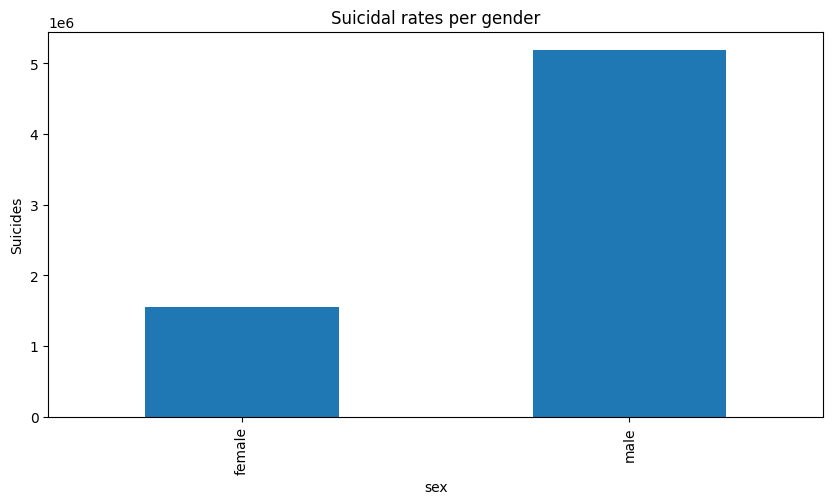

In [43]:
sr.groupby('sex')['suicides_no'].sum().sort_values().plot(kind='bar', figsize=(10,5), title='Suicidal rates per gender')
plt.ylabel('Suicides')

Males have higher suicidal fatalities than females.

Text(0.5, 0, 'Suicides')

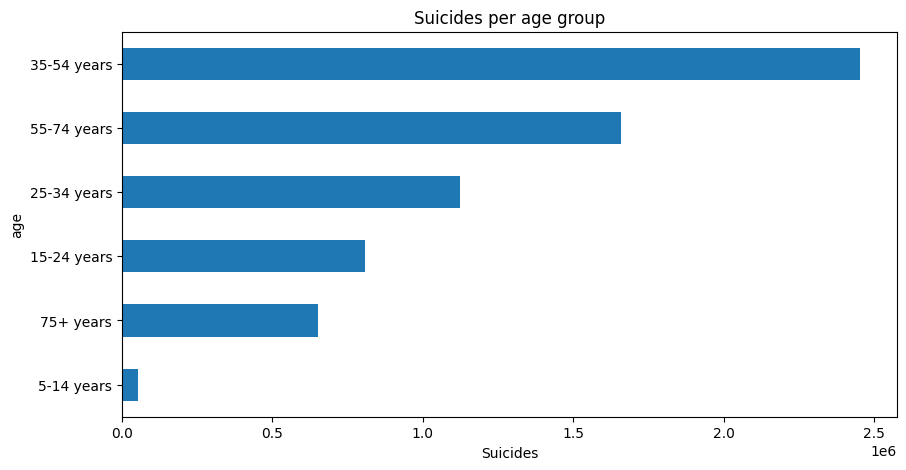

In [44]:
sr.groupby('age').sum()['suicides_no'].sort_values().plot(kind='barh', figsize=(10,5), title='Suicides per age group')
plt.xlabel('Suicides')

The age between 35 to 54 is where most people are killing themselves.

Text(0.5, 0, 'suicides')

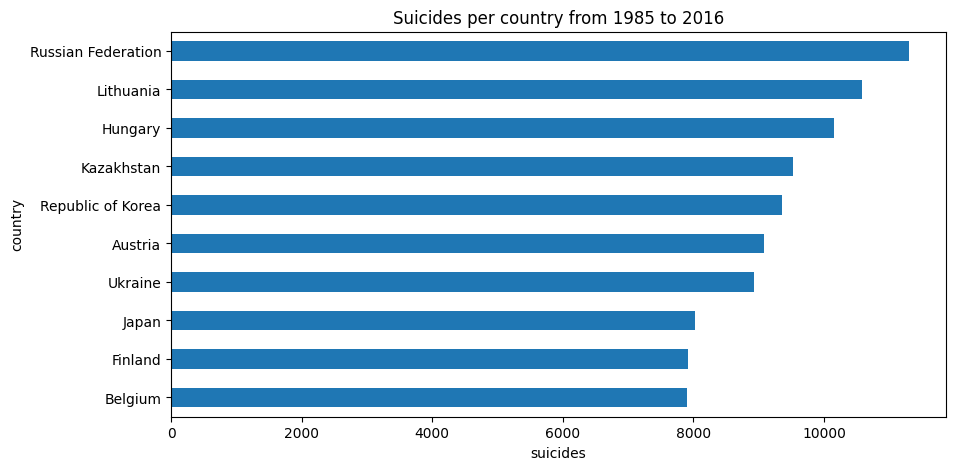

In [45]:
sr.groupby('country').sum()['suicides/100k pop'].sort_values().iloc[-10:,].plot(kind='barh', figsize=(10,5), title='Suicides per country from 1985 to 2016')
plt.xlabel('suicides')

Russia Federation is the country with the highest suicial rate.  (number of suicides per 100k people).

Text(0.5, 0, 'suicides')

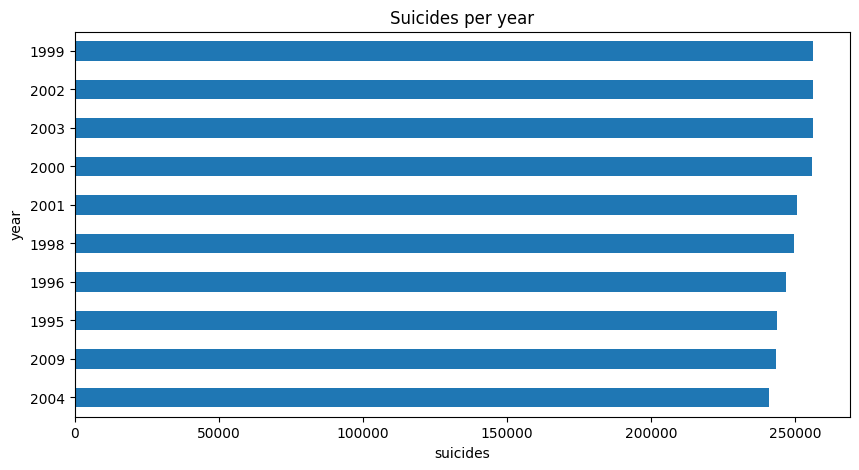

In [46]:
sr.groupby(level=0).sum()['suicides_no'].sort_values().iloc[-10:,].plot(kind='barh', figsize=(10,5), title='Suicides per year')
plt.xlabel('suicides')

1999, 2002, 2003 and 2000 are the years where suicide levels were highest.

Text(0, 0.5, 'Suicides')

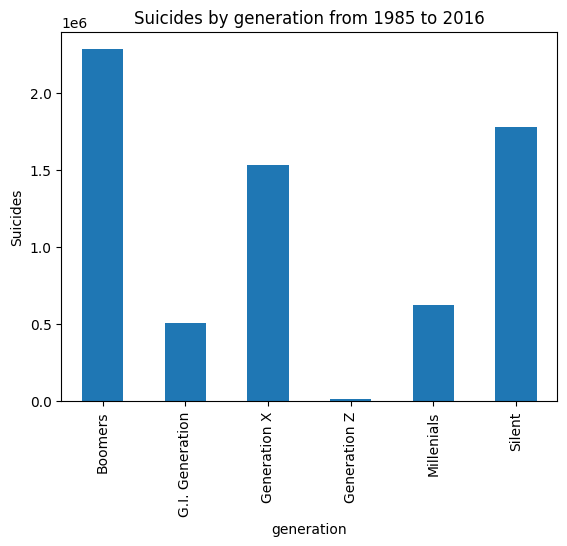

In [47]:
sr.groupby('generation').sum()['suicides_no'].plot(kind='bar', title='Suicides by generation from 1985 to 2016')
plt.ylabel("Suicides")

The Boomers and Silent generation have the highest suicide levels.  Gen Z is at a relatively low.

In [48]:
def suicide_hist(country):
    return sr[sr.country==country]['suicides_no'].plot(kind='hist', title=f'Histogram on suicides in {country}')

Text(0.5, 0, 'suicides')

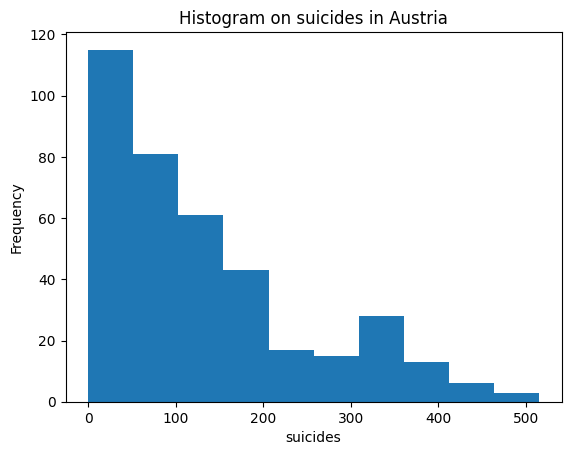

In [49]:
suicide_hist('Austria')
plt.xlabel('suicides')

I created a function which returns a histogram of a particular country for the number of suicides.<br>
Per particular gender and age group on a specific year, most suicides are between 0 to 50.<br>
As compared to the other countries we have seen this is a good statistic.<br>
The distribution is positively skewed.

In [50]:
highest_suicidal_countries = sr.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False)[0:5].index

Text(0.5, 0, 'suicides')

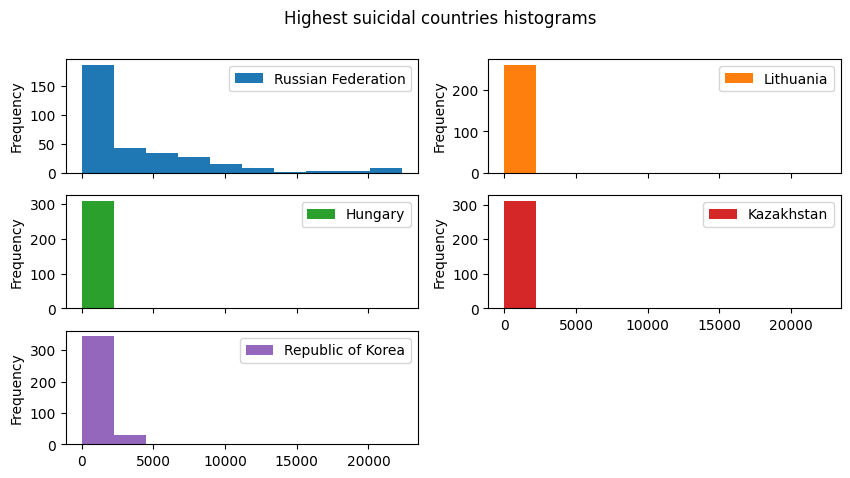

In [51]:

sr.reset_index().pivot(columns='country', values='suicides_no')[highest_suicidal_countries].plot(kind='hist', subplots=True, layout=(3,2), figsize=(10,5), title='Highest suicidal countries histograms')
plt.xlabel('suicides')

I plotted the histograms for the countries with the most suides per 100k population.<br>
Because Russia Federation's suicide cases are over the roof, the rest of the countries histogram's distributions are somewhat weird.(I don't know the statistical term for this)<br>
But fear not, we have a function that looks at the histogram of a particular country.

Text(0.5, 0, 'suicides')

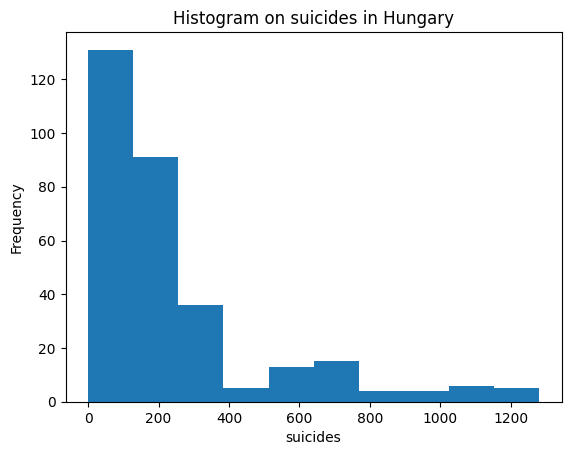

In [52]:
suicide_hist("Hungary")
plt.xlabel('suicides')

In [53]:
highest_suicidal_countries = ['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan', 'Republic of Korea']


In [54]:
sr.query(f'country=={highest_suicidal_countries}')

country     sex          age  suicides_no  population  \
year                                                                    
1985  Republic of Korea    male    75+ years           42      154800   
1985  Republic of Korea    male  55-74 years          393     1498300   
1985  Republic of Korea    male  35-54 years          903     4285700   
1985  Republic of Korea    male  25-34 years          655     3616800   
1985  Republic of Korea    male  15-24 years          678     4413000   
...                 ...     ...          ...          ...         ...   
2016            Hungary    male  25-34 years           98      633114   
2016            Hungary  female  55-74 years          161     1346205   
2016            Hungary    male  15-24 years           58      568065   
2016            Hungary  female  35-54 years          121     1432415   
2016            Hungary  female  25-34 years           30      602785   

      suicides/100k pop           country-year  gdp_for_year ($)  \
year                                                               
1985              27.13  Republic of Korea1985      100273097170   
1985              26.23  Republic of Korea1985      100273097170   
1985              21.07  Republic of Korea1985      100273097170   
1985              18.11  Republic of Korea1985      100273097170   
1985              15.36  Republic of Korea1985      100273097170   
...                 ...                    ...               ...   
2016              15.48            Hungary2016      125816640421   
2016              11.96            Hungary2016      125816640421   
2016              10.21            Hungary2016      125816640421   
2016               8.45            Hungary2016      125816640421   
2016               4.98            Hungary2016      125816640421   

      gdp_per_capita ($)       generation suicides_rate population_rate  
year                                                                     
1985                2731  G.I. Generation           low             low  
1985                2731  G.I. Generation           low             low  
1985                2731           Silent           low             low  
1985                2731          Boomers           low             low  
1985                2731     Generation X           low             low  
...                  ...              ...           ...             ...  
2016               13448       Millenials           low             low  
2016               13448          Boomers           low             low  
2016               13448       Millenials           low             low  
2016               13448     Generation X           low             low  
2016               13448       Millenials           low             low  

[1580 rows x 12 columns]

<AxesSubplot:title={'center':'Population vs Number of suicides'}, xlabel='population', ylabel='suicides_no'>

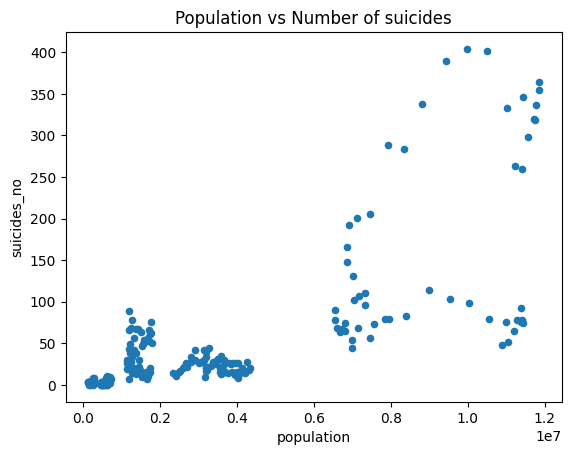

In [55]:
sr.query(f'country=={highest_suicidal_countries} and age=="5-14 years" ').plot(kind='scatter', x='population', y='suicides_no', title='Population vs Number of suicides')

There is a positive correlation between the population and the number of suicides for countries with the highest suicidal rates.  (no of suicides per 100k)

In [56]:
high_sr = sr.query(f'country=={highest_suicidal_countries}')

Text(0, 0.5, 'Suicides')

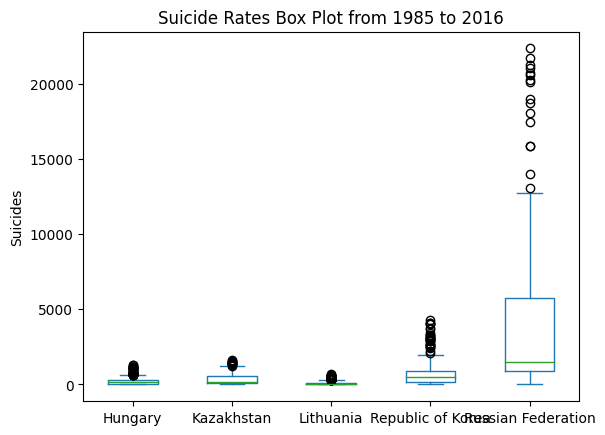

In [57]:
high_sr.reset_index().pivot(columns='country', values='suicides_no').plot(kind='box', title='Suicide Rates Box Plot from 1985 to 2016')
plt.ylabel('Suicides')

Box plots showing suicide fatalities for the countries with the highest suicidal rates.<br>


## **If you've read this until the end a big shout out to you.
22 July 2023 10:47 a.m<br>
The Good Writer/Che